
# MNIST Hand Written Digit Classification 
* You are given the MNIST dataset below, select two digits from the data, e.g. 0 and 5, and 
* use any two machine learning models to classify the two different images. Each method is 50 points.
* Please specify how you train your models, how you obtain your model parameters, and how you evaluate your model.
    * (Bonus 20 points) Use any one method to classify any three digits (e.g. 0 vs 1 vs 2)
* (Bonus 20 points) Can you write down a digit on a paper, take a picture, and let your model tell which digit is it?
* (Bayesian bonus) If you are able to give Bayesian intpretation of your model, a total of 20 bonus points.
* Mandatory part: 100 points, bonus parts: 40 points. Perfect score: 160 points. (your score)/(100) * 15 is the total
* credit to your final grade

In [18]:
import numpy as np
from sklearn.datasets import fetch_mldata

In [19]:
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

print(X.shape) 
print(y.shape)

C:\Users\nisht\New folder\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\nisht\New folder\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


(70000, 784)
(70000,)


In [20]:
import pandas as pd

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None

print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [21]:
rndperm = np.random.permutation(df.shape[0])

<Figure size 432x288 with 0 Axes>

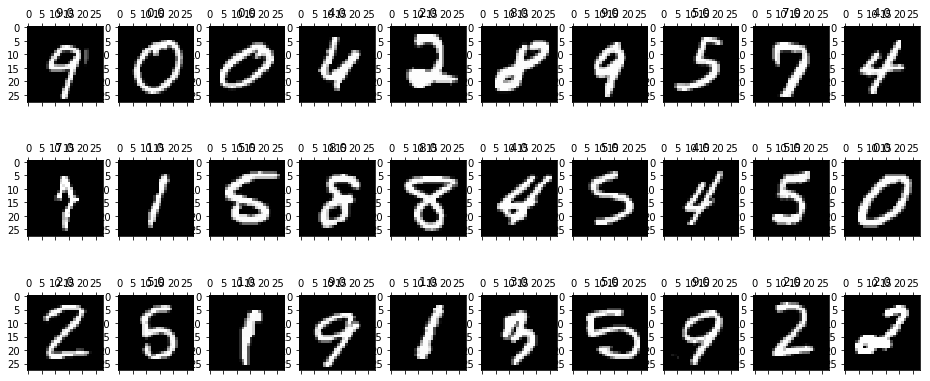

In [22]:

import matplotlib.pyplot as plt
%matplotlib inline
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title=str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

In [23]:
#Slicing dataframe for label value = 0 and 4
df_2=df[(df.label=='0.0') | (df.label=='4.0') ] # creating a dataset with labels 0 and 4
df_2.shape

(13727, 785)

In [24]:
# Create train-test split for 0 and 4 labels
#X and Y rows are fetched with labels 0 and 4 and then subset is divided into test and train in 30:70 ratio
from sklearn.model_selection import train_test_split
X=df_2.drop('label',1)
Y=df_2['label']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)


In [25]:
#Random Forest model implementation 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
#I train the model with _train and Y_train 
classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [26]:
#prediction is made on the input X_test with the model that was trained with X_train and Y_train
Y_pred = classifier.predict(X_test)

In [27]:
#Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(Y_test,Y_pred))  
print(classification_report(Y_test,Y_pred))  
print(accuracy_score(Y_test, Y_pred)) 

#High accuracy of 99.6% is achieved. High precision and high F-1 score. Indicates that the model is capable of identifying
#1's as 1's and 0's as 0's
#From confusion matrix, we can see that we have only 8 and 5 as false positive and false negative

[[2082    8]
 [   5 2024]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2090
         4.0       1.00      1.00      1.00      2029

   micro avg       1.00      1.00      1.00      4119
   macro avg       1.00      1.00      1.00      4119
weighted avg       1.00      1.00      1.00      4119

0.9968438941490653


In [28]:
# Implementing Gaussian NB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

clf = GaussianNB()

clf.fit(X_train, Y_train)
yhat = clf.predict(X_test)

In [29]:
#Evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(Y_test,yhat))  
print(classification_report(Y_test,yhat))  
print(accuracy_score(Y_test, yhat))

#High accuracy of 94.8% is achieved. High precision and high F-1 score. Indicates that the model is capable of identifying
#1's as 1's and 0's as 0's
#From confusion matrix, we can see that we have only 14 and 198 as false positive and false negative i.e (14+198) are predicted
#wrong out of (2076+14+198+1831)

[[2076   14]
 [ 198 1831]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      2090
         4.0       0.99      0.90      0.95      2029

   micro avg       0.95      0.95      0.95      4119
   macro avg       0.95      0.95      0.95      4119
weighted avg       0.95      0.95      0.95      4119

0.9485311968924496


In [30]:
# Use any one method to classify three digits- 0, 4 and 7

#SLicing dataframe for these 3 labels
df_3=df[(df.label=='0.0') | (df.label=='4.0') | (df.label=='7.0')] # creating a dataset with labels 0, 4 and 7
df_3.shape

(21020, 785)

In [31]:
# Create train-test split for 0, 4 and 7 labels
#X and Y rows are fetched with labels 0, 4 and 7 and then subset is divided into test and train in 30:70 ratio
from sklearn.model_selection import train_test_split
X_new=df_3.drop('label',1)
Y_new=df_3['label']
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_new, Y_new, test_size=0.30, random_state=42)

In [32]:
# Implementing KNN for 3 didgit classification
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=100,weights='uniform')
knn.fit(X_train_new,Y_train_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [33]:
#knn prediction
Y_pred_knn=knn.predict(X_test_new)

#creates a confusion matrix to determine correct predictions
matrix_knn = confusion_matrix(Y_test_new, Y_pred_knn)

In [34]:
#Evaluation
from sklearn.metrics import classification_report
print("Confusion Matrix:")
print(matrix_knn)
report_knn = classification_report(Y_test_new, Y_pred_knn)
print("Classification Report:")
print(report_knn)
accuracy_knn=np.mean(Y_pred_knn==Y_test_new)
print("Accuracy for rfc: ",accuracy_knn)

#High accuracy of 99% is achieved. High precision and high F-1 score. Indicates that the model is capable of identifying
#1's as 1's and 0's as 0's
#From confusion matrix, we can see that we have 2033, 2053 and 2160 as true classes prediction.

Confusion Matrix:
[[2033    5    9]
 [   5 2053   10]
 [   4   27 2160]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2047
         4.0       0.98      0.99      0.99      2068
         7.0       0.99      0.99      0.99      2191

   micro avg       0.99      0.99      0.99      6306
   macro avg       0.99      0.99      0.99      6306
weighted avg       0.99      0.99      0.99      6306

Accuracy for rfc:  0.9904852521408183


C:\Users\nisht\New folder\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


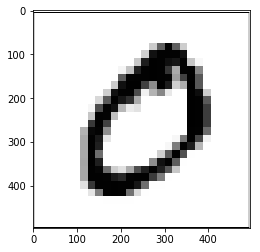

In [35]:
#Importing te image from computer

from skimage.io import imread
from skimage.transform import resize
from matplotlib import pyplot as plt

#I import and image of 0 that has dimension 497*495
import matplotlib.cm as cm
x = ("C:/Users/nisht/Desktop/0digit.png")
image = imread(x, as_grey=True)
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()



In [36]:
#Changed dimension to 28*28 as we have our models learnt on 28*28 pixel size image
image_2d = np.resize(image, (28, 28))
image_2d.shape

(28, 28)

In [37]:
#Here, we converted 2D image into an array and then made 1 dimensional view of array so that this becomes a vector of 1*784 size
#Here, we aretryoing to make our image data similar to the data that we have in MNIST dataset

import numpy as np
from PIL import Image

#img = Image.open('orig.png').convert('RGBA')
arr = np.array(image_2d)

# record the original shape
shape = arr.shape

# make a 1-dimensional view of arr
flat_arr = arr.ravel()

# convert it to a matrix
vector = np.matrix(flat_arr)

In [38]:
vector.shape

(1, 784)

In [39]:
#assigning a and b as X and Y
a=vector
b='0.0'

In [40]:
#Creating a dataframe that has 784 features(as a) and one label=0 as b

import pandas as pd

cols = [ 'pixel'+str(i) for i in range(a.shape[1]) ]

dff = pd.DataFrame(a,columns=cols)
dff['label'] = b
dff['label'] = dff['label'].apply(lambda i: str(i))


print('Size of the dataframe: {}'.format(dff.shape))

Size of the dataframe: (1, 785)


In [41]:
#let's have view of the new dataframe
dff

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [42]:
# Implementing KNN for our hand-written didgit classification
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=100,weights='uniform')
knn.fit(X_train_new,Y_train_new)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [43]:
#Below we input a (features of the image that I uploaded) as test data input

Y_pred_n = knn.predict(a)

['0.0']


C:\Users\nisht\New folder\lib\site-packages\skimage\io\_io.py:49: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


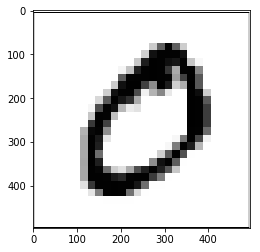

In [44]:
#Let's see what our KNN model predicted vs what we uploaded

print(Y_pred_n)

#image that was classified
image = imread(x, as_grey=True)
plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()
